In [2]:
# Importing the libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit, train_test_split
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from imblearn.ensemble import BalancedRandomForestClassifier
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [3]:
# Importing the dataset
models_output = {}
dataset = pd.read_csv('owid-covid-data.csv')

# Data preprocessing
dataset = dataset[dataset['continent'] == 'North America'][dataset['location'] == 'Canada'][['date','total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'reproduction_rate', 'icu_patients', 'hosp_patients', 'new_tests', 'total_tests', 'positive_rate', 'tests_per_case', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'stringency_index']]

C:\Users\dolgi\AppData\Local\Temp\ipykernel_19252\930934144.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataset = dataset[dataset['continent'] == 'North America'][dataset['location'] == 'Canada'][['date','total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'reproduction_rate', 'icu_patients', 'hosp_patients', 'new_tests', 'total_tests', 'positive_rate', 'tests_per_case', 'total_vaccinations',


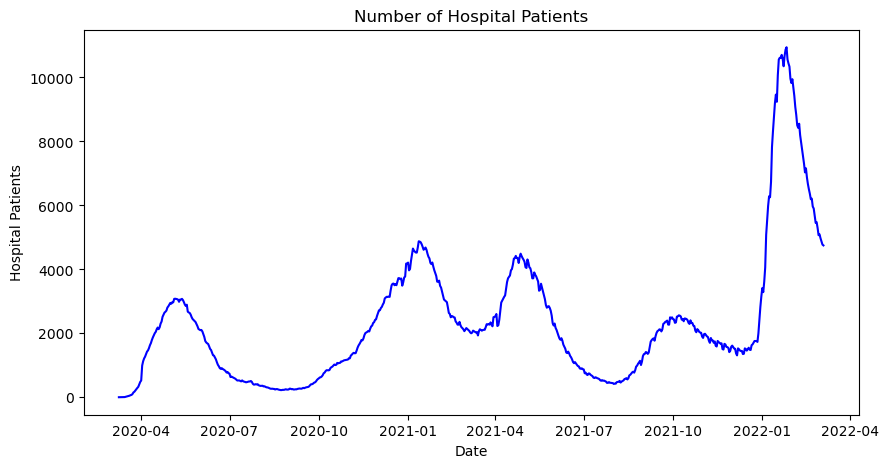

In [4]:
# Data Filtering
dataset['date'] = pd.to_datetime(dataset['date'])
dataset = dataset.set_index('date')
dataset = dataset.sort_index()

plt.figure(figsize=(10, 5))
plt.xlabel('Date')
plt.ylabel('Hospital Patients')
plt.title('Number of Hospital Patients')
plt.plot(dataset['hosp_patients'], color='blue')
plt.show()

In [5]:

current_seed_update = ('MT19937', np.array([2147483648,3908464241,1243559215,4053627450,3015545630,1719094000,149810829,3434926939,1263844855,1894869302,808003065,3993494240,2823433065,2868707514,168884240,1997204013,4120038321,1303874096,1021590676,3246776226,3563210305,1171820639,3499504182,1483623945,741006601,3784743761,1753970331,1309429099,3637216616,3115952894,1852180774,2747638882,2835605152,396164891,4069614113,2505531888,3526618768,3028085499,2243394135,787825170,406883043,2464098584,3496871742,1112546231,3537645055,3250494969,2899580756,2756254318,3042512762,4258075722,2108820546,952988650,4023464434,1103726158,1366986074,3794059587,1205811964,4292092691,4069051672,942319693,1827493198,4095045970,4107559956,902508908,2006776895,3314683669,639091751,3936766721,1320171027,3568944190,2477181638,141017472,217698906,2632794410,274712719,207723142,507114778,2730896513,2096413172,3530492232,1479605779,656649380,3758211953,3074064157,1543274975,1478648229,1957650703,1816385572,2572533878,3714212773,2566993937,3912345686,183369550,2140735710,3010906422,1565158637,1492602708,3533241887,1828101958,3522342741,2942233597,4087197978,4233629368,2154826391,531391759,448488828,1747841661,3828315080,3505297357,3855000961,270343837,2798268141,973740073,575180751,2318671556,2465687504,170916876,4058176101,384309704,3506475111,588928569,356529543,3822559559,4235780639,1607892597,1708428435,3542741225,1231210437,2709844519,686630506,803564245,1665091736,3761471632,737730431,4212373363,1911383562,2923559138,537428431,1375488556,4116873605,3627424533,442329114,2946578337,906670893,1591197940,3091068858,3454471063,3479128440,2362932980,2584283022,665906960,4288004594,2613758697,3153967418,2380016076,2101368359,677418435,3868671440,2373976256,359217870,2209549328,877741270,2865265784,1963796906,345409589,698093339,3397037978,2651720425,2112421707,2008364146,3393099630,912865166,1097395787,620495035,2514941030,3998959740,1922656442,3053569926,1581443506,1131147340,408102512,183010671,733079953,1920923929,2389259082,2020154542,2669402763,2806943529,611802580,1411520869,2431329835,1189419586,860096743,257252818,3904585867,3754288738,3724813991,3716547841,1844597394,3390647294,2670100869,1132537414,1273238836,158005133,1411587840,165830565,751257543,2297662420,4105687700,1297440466,736248466,1993180906,2656289904,3851412488,374271470,928529215,3972019683,1443172546,1123116513,362872007,2078137982,4017410099,2417111122,3263339301,2749289597,3707267199,4033300951,2254135548,3464186584,2504630222,2195577405,239451298,2294444641,3922587146,2039732675,190284976,3451980514,1242579543,4079765420,1649529462,2979664825,2155394559,2297057818,17767464,3794121734,2084343739,3574800435,2786430834,1635767388,357612951,419156075,753232514,552968534,3527238522,990016194,2600213595,4206053648,11245100,3720828663,4197243275,1810737998,3656541557,1069911461,592731315,3030495746,1271423503,179186558,25271654,3882374219,466952594,179451058,1221060064,3144852817,2032840365,296951235,2408063407,568230909,2649946229,1434876710,666833368,2650463449,2843419580,1983568938,3216256211,2304619774,1098834489,169523546,1872033843,1797002431,1472048954,199202671,3461532405,910764778,53734836,2311930413,760762815,3859481768,1878172725,2330061233,467370556,2335671316,1212261382,3921473084,1680517645,2638780267,3063697179,2791201710,2232102444,1129971066,1360987800,3533929091,1327692869,2205326929,3287625522,3508345485,3990175154,2420570597,4219989696,1439598862,3683229486,2335846553,2590982376,4051902387,3768811780,2777025829,2247894395,2954433913,436868077,3548163551,3738972955,3373641157,2398955546,4119559848,676738577,341968226,4250994246,2077818363,770618985,3100415932,3093749825,607231506,1621338404,3105446073,2707084605,2747046559,3250524024,1518991257,2386980641,649339671,3210197008,3811976566,1514249190,1210892175,2473701366,2673926352,2643727155,2380163453,2707190747,1807406426,3429729930,412303920,903264785,3221612117,976621009,2910181974,3071371094,469812864,4072073873,1488345749,1238365256,2066013140,1707135207,1153450723,3493817272,3679715444,987261887,717721572,225000878,544272096,3589045131,3138222766,2863584233,2510551651,2297751123,3216935965,3833788933,2673200741,990490798,2790319859,3651427619,4185121043,3109887674,435658580,1956627800,3923004932,1513578192,2637073933,1868918050,2328522442,2181351203,2422103677,214979415,1543342477,35853316,2918289362,3863202756,3285702519,617888435,3848037503,1170364165,1853185637,2793393432,2473885399,968708858,3187697472,3304999769,2564769660,1704125717,2333698473,3530837715,3263630884,96711492,98055224,2384395001,2664938612,1283989327,4059568296,439278537,2944213086,4233054216,2483992974,3282826636,1097141062,2404388567,2025306951,1102123670,476447301,811479001,3236318918,149001094,3818684095,1481256077,4160858513,1503093232,4166201840,2331203508,892483570,3963453594,2940646629,2526213141,3882832735,1230799099,3030236222,539642029,3591822710,1764890837,759878633,2458969943,1366113213,2255784083,63535338,3539023030,3665587580,4274822635,850261134,3131087143,167607437,3425750039,2985810900,4174408023,3217127521,1008771143,4235793754,3615654213,3918617217,8407527,1559025999,357685782,198895514,3489974691,3672411463,3830522070,3401584496,752200306,307066606,2513964895,168242919,4116875141,4033411787,4032358303,3197276866,2219514796,4269418841,4128992860,3545781208,46744302,930514261,3095395832,681758290,2328352736,830650273,918205757,2240562348,2178771130,934490768,2191080030,3883578346,1564478247,3471933266,534208144,2022239560,1799159195,2973782755,1432417255,1721725359,857866373,2622188776,150881401,1378692173,3431154532,3004913080,3370119448,933993083,982836851,3222442801,1794941115,4213928235,2872428050,556404489,1429058218,1909287357,1033941895,616736481,1101771820,729600476,3066818732,2083298575,2600468935,1338702298,3695185703,2612057619,3289708371,3143779362,3969014581,1940155399,1388272184,3899932868,1432523205,3091698916,1041973404,1203490907,3387380992,3682818336,3901043522,3695457044,14952707,3346409557,1819611186,2469085355,3006545171,98349055,497816619,3088626152,2957314914,2883806656,883217187,1750604920,2411732135,1630415885,1404481393,3055608240,4179138943,1490440565,3945287279,2840953237,3532391979,1185291525,3760982699,3783400370,4262563766,3714667978,2194715223,507866917,870885903,791445903,3930789772,977128173,3776964600,493536841,830840770,693597271,1801838658,2769163053,62498878,1437265626,346393730,3949527370,2014650770,2689863156,3844170054,853367806,1330418059,1678597405,1989380084,2517201834,3960765267,1455637635,3421882962,2956703640,3521813869,1375590989,3202502725,1113085691,1353462315,507516064,4261979375,2654803102,1787950422,2727022811,2971039473,2096966622,4047343994,3439127164,3509643543]), 623, 0, 0.0)


In [6]:
# Data Filtering
dataset.loc[pd.to_datetime('2020-12-14')]['new_vaccinations'] = dataset.loc[pd.to_datetime('2020-12-14')]['total_vaccinations']

dataset.loc['2022-02-12']['new_vaccinations'] = dataset.loc['2022-02-11']['new_vaccinations'] + ( dataset.loc['2022-02-14']['new_vaccinations'] - dataset.loc['2022-02-11']['new_vaccinations'] ) / 4
dataset.loc['2022-02-13']['new_vaccinations'] = dataset.loc['2022-02-12']['new_vaccinations'] + ( dataset.loc['2022-02-14']['new_vaccinations'] - dataset.loc['2022-02-11']['new_vaccinations'] ) / 4

dataset.loc['2020-03-10']['new_tests'] = np.floor(dataset.loc['2020-03-09']['new_tests'] + ( dataset.loc['2020-03-12']['new_tests'] - dataset.loc['2020-03-09']['new_tests'] ) / 4)
dataset.loc['2020-03-11']['new_tests'] = np.floor(dataset.loc['2020-03-10']['new_tests'] + ( dataset.loc['2020-03-12']['new_tests'] - dataset.loc['2020-03-09']['new_tests'] ) / 4)

dataset.loc['2020-03-02']['new_tests'] = np.floor(dataset.loc['2020-03-01']['new_tests'] + ( dataset.loc['2020-03-06']['new_tests'] - dataset.loc['2020-03-01']['new_tests'] ) / 6)
dataset.loc['2020-03-03']['new_tests'] = np.floor(dataset.loc['2020-03-02']['new_tests'] + ( dataset.loc['2020-03-06']['new_tests'] - dataset.loc['2020-03-01']['new_tests'] ) / 6)
dataset.loc['2020-03-04']['new_tests'] = np.floor(dataset.loc['2020-03-03']['new_tests'] + ( dataset.loc['2020-03-06']['new_tests'] - dataset.loc['2020-03-01']['new_tests'] ) / 6)
dataset.loc['2020-03-05']['new_tests'] = np.floor(dataset.loc['2020-03-04']['new_tests'] + ( dataset.loc['2020-03-06']['new_tests'] - dataset.loc['2020-03-01']['new_tests'] ) / 6)

dataset.loc['2022-02-12', ['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters']] = dataset.loc['2022-02-11':'2022-02-13', ['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters']].mean()
dataset.loc['2022-02-12', ['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters']] = dataset.loc['2022-02-11':'2022-02-13', ['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters']].mean()
dataset.loc['2022-02-12', ['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters']] = dataset.loc['2022-02-11':'2022-02-13', ['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters']].mean()
dataset.loc['2022-03-01', ['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations']] = dataset.loc['2022-02-28', ['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations']]

dataset.loc['2020-03-02', ['total_tests']] = dataset.loc['2020-03-01':'2020-03-03', ['total_tests']].mean()
dataset.loc['2020-03-04', ['total_tests']] = dataset.loc['2020-03-03':'2020-03-05', ['total_tests']].mean()
dataset.loc['2020-03-10', ['total_tests']] = dataset.loc['2020-03-09':'2020-03-11', ['total_tests']].mean()

missing_Rt = dataset.loc['2020-02-29':'2020-03-12', ['new_cases', 'total_cases']]
missing_Rt = missing_Rt.assign(reproduction_rate = missing_Rt['new_cases'] / missing_Rt['total_cases'].shift(1) + 2)['reproduction_rate'].to_frame()

dataset.loc['2020-03-01':'2020-03-11', ['reproduction_rate']] = missing_Rt['2020-03-01':'2020-03-11']

dataset.loc[(dataset.index >= pd.to_datetime('2022-02-26')) & (dataset.index <= pd.to_datetime('2022-03-01')), ['stringency_index']] = dataset.loc[(dataset.index >= pd.to_datetime('2022-02-26')) & (dataset.index <= pd.to_datetime('2022-03-01')), ['stringency_index']].fillna(dataset.loc['2022-02-25', ['stringency_index']])


dataset[['total_deaths', 'new_deaths', 'icu_patients', 'hosp_patients', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations']] = dataset[['total_deaths', 'new_deaths', 'icu_patients', 'hosp_patients', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations']].fillna(0)

#Add lockdown column
dataset["is_lockdown"] = 0
dataset["is_lockdown"] = dataset["is_lockdown"].astype(int)
dataset.loc['2020-03-17':'2020-05-18', ["is_lockdown"]] = 1
dataset.loc['2020-11-07':'2021-01-23', ["is_lockdown"]] = 1
dataset.loc['2021-04-03':'2021-06-02', ["is_lockdown"]] = 1

#Dataset is truncated to the period of the pandemic
dataset = dataset.truncate(before=pd.to_datetime('2020-03-01'), after=pd.to_datetime('2022-03-01'))

#Check for missing values
assert not dataset.isnull().sum().sum(), "There are still missing values in the dataset."

print(dataset.columns)

Index(['total_cases', 'new_cases', 'total_deaths', 'new_deaths',
       'reproduction_rate', 'icu_patients', 'hosp_patients', 'new_tests',
       'total_tests', 'positive_rate', 'tests_per_case', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'stringency_index', 'is_lockdown'],
      dtype='object')


In [9]:
# Shape of data set
print(dataset.shape)

(731, 18)


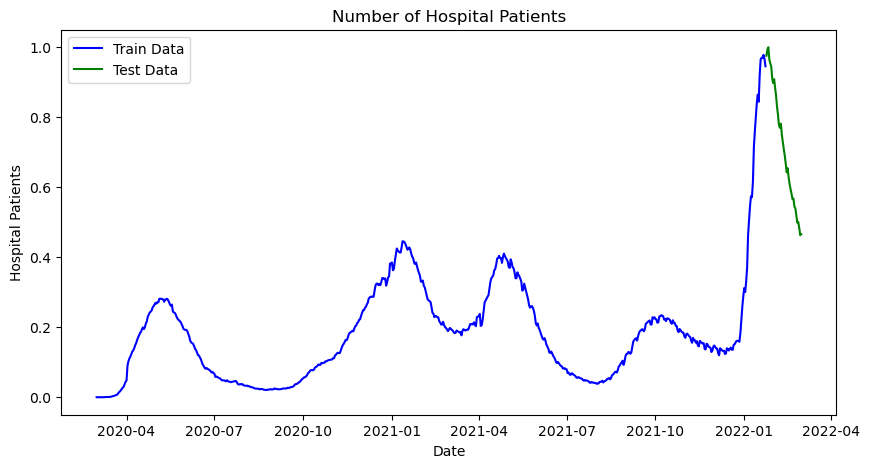

In [17]:
# Data Preprocessing for ARIMA
arima_data = dataset['hosp_patients'].copy().to_frame()
arima_data.index.freq = pd.infer_freq(arima_data.index)
arima_data = (arima_data - arima_data.min()) / (arima_data.max() - arima_data.min())
arima_train, arima_test = train_test_split(arima_data, test_size=0.05, shuffle=False)

plt.figure(figsize=(10, 5))
plt.xlabel('Date')
plt.ylabel('Hospital Patients')
plt.title('Number of Hospital Patients')
plt.plot(arima_train, label="Train Data", color='blue')
plt.plot(arima_test, label="Test Data", color='green')
plt.legend()
plt.show()


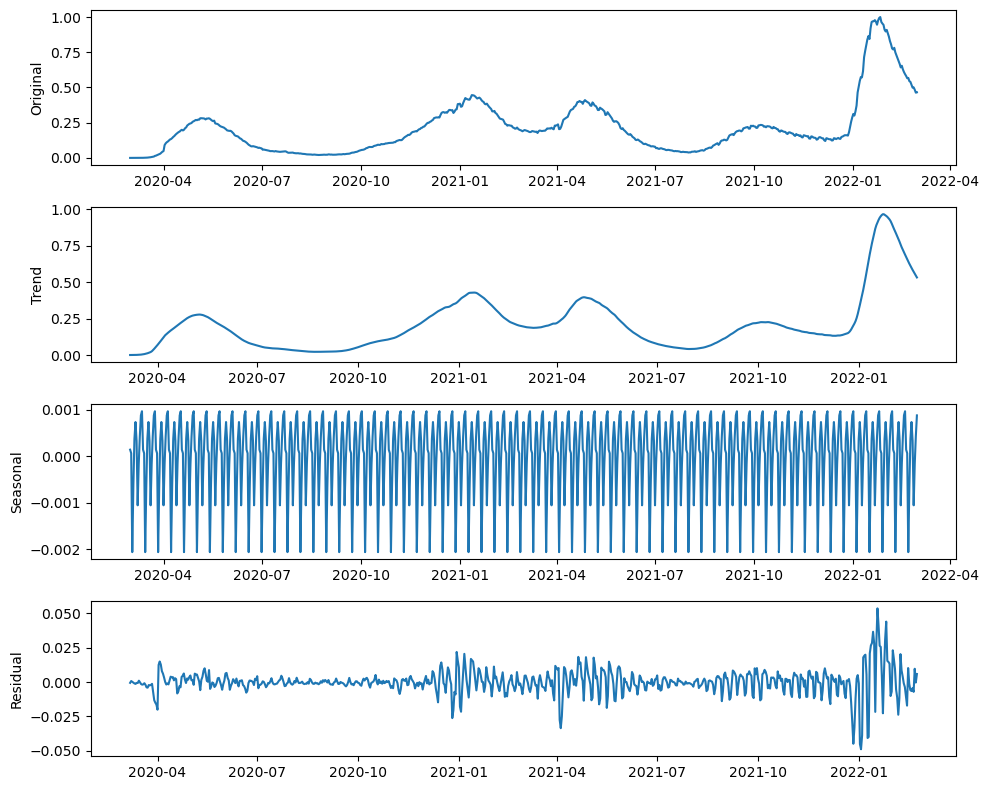

In [18]:
import statsmodels.api as sm

#Seasonal Decomposition
decomposition = sm.tsa.seasonal_decompose(arima_data, model='additive', period=12)  # Adjust the period based on the expected seasonality

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8))

ax1.plot(arima_data)
ax1.set_ylabel('Original')

ax2.plot(arima_data.index, decomposition.trend)
ax2.set_ylabel('Trend')

ax3.plot(arima_data.index, decomposition.seasonal)
ax3.set_ylabel('Seasonal')

ax4.plot(arima_data.index, decomposition.resid)
ax4.set_ylabel('Residual')

plt.tight_layout()
plt.show()

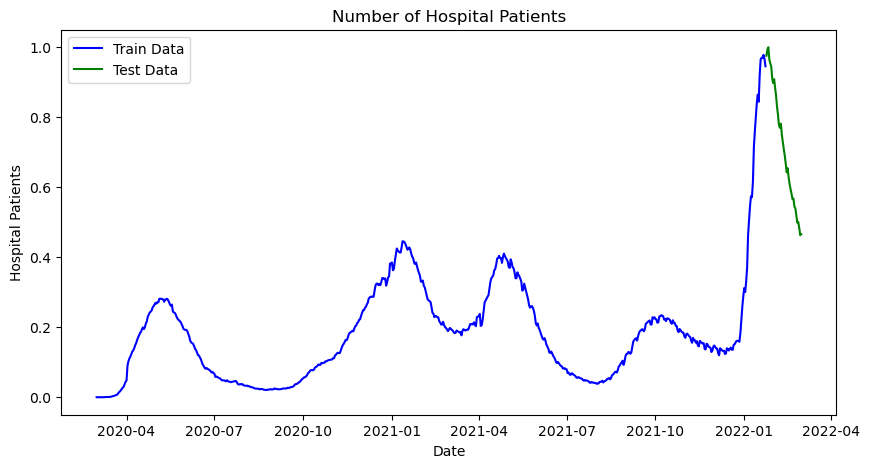

In [19]:
plt.figure(figsize=(10, 5))
plt.xlabel('Date')
plt.ylabel('Hospital Patients')
plt.title('Number of Hospital Patients')
plt.plot(arima_train, label="Train Data", color='blue')
plt.plot(arima_test, label="Test Data", color='green')
plt.legend()
plt.show()

In [30]:
# Check for stationarity
def check_stationarity(timeseries):
    # Perform Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

check_stationarity(arima_data)

Results of Dickey-Fuller Test:


ValueError: x is required to have ndim 1 but has ndim 2

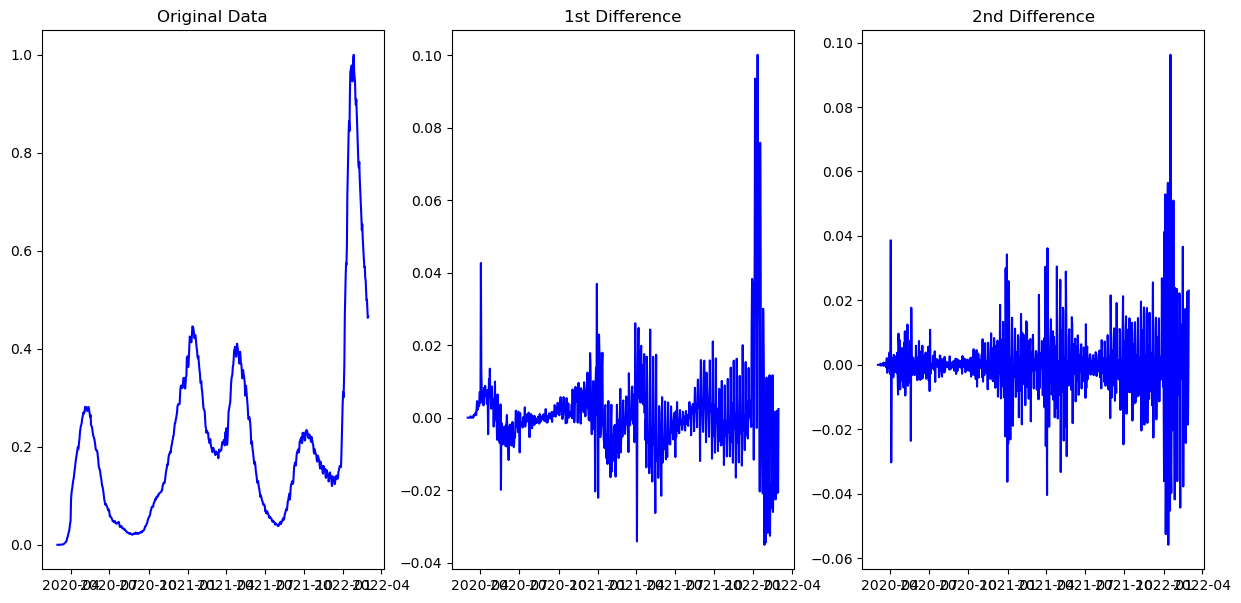

In [21]:
# Differencing
arima_data['hosp_patients_diff'] = arima_data['hosp_patients'].diff()
arima_data['hosp_patients_diff_2'] = arima_data['hosp_patients'].diff().diff()

# Plot difference data
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,7))
ax1.plot(arima_data.index, arima_data.hosp_patients, color='blue')
ax1.set_title('Original Data')
ax2.plot(arima_data.index, arima_data.hosp_patients_diff, color='blue')
ax2.set_title('1st Difference')
ax3.plot(arima_data.index, arima_data.hosp_patients_diff_2, color='blue')
ax3.set_title('2nd Difference')
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

#Check ACF and PACF
def plot_acf_pacf(data, lags=40):
    # Autocorrelation
    fig, ax = plt.subplots(2, 1, figsize=(8, 8))
    plot_acf(data, lags=lags, ax=ax[0])
    ax[0].set_title('Autocorrelation')
    ax[0].set_ylabel('ACF')

    # Partial Autocorrelation 
    plot_pacf(data, lags=lags, ax=ax[1])
    ax[1].set_title('Partial Autocorrelation')
    ax[1].set_ylabel('PACF')

    plt.tight_layout()
    plt.show()

plot_acf_pacf(arima_data.hosp_patients, lags=40)


In [16]:
# Searching from best p, d, q values for ARIMA
from numpy import sqrt
from sklearn.metrics import mean_squared_error
from statsmodels.tools.sm_exceptions import ConvergenceWarning

p_params = [1, 2]
d_params = [1,2,3,4]
q_params = [1,2,3]
best_rmse = 9999
best_params = None
result_val = []

for p_val in p_params:
    for d_val in d_params:
        for q_val in q_params:
            model = ARIMA(arima_train, order = (p_val, d_val, q_val))
            model_fit = model.fit()
            predictions = model_fit.predict(start=arima_test.index[0], end=arima_test.index[-1]).to_frame()
            rmse = sqrt(mean_squared_error(arima_test, predictions.predicted_mean))
            result_val.append((rmse, (p_val, d_val, q_val)))
            if rmse <= best_rmse:
                best_rmse = rmse
                best_params = (p_val, d_val, q_val)

c:\Users\dolgi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\dolgi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\dolgi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\dolgi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\dolgi\anaconda3\lib\site-packa

In [31]:
#Running ARIMA model with best parameters
def run_arima_model(model_params):
    model = ARIMA(arima_train, order = model_params)
    model_fit = model.fit()
    print(model_fit.summary())
    predictions = model_fit.predict(start=arima_test.index[0], end=arima_test.index[-1]).to_frame()
    rmse = sqrt(mean_squared_error(arima_test, predictions.predicted_mean))
    print("RSME:", rmse)
    plt.figure(figsize=(10, 5))
    plt.plot(arima_train, color='blue', label='Original train data')
    plt.plot(arima_test, color='yellow', label='Original test data')
    plt.plot(arima_test.index, predictions.predicted_mean, color='green', label='Predicted data')
    plt.title('ARIMA Model - Predicted vs True')
    plt.legend()
    plt.show()
    return rmse, np.mean(np.abs(predictions.values - arima_test.values) < 10**(-1))

_ = run_arima_model(best_params)
models_output["arima"] = {'RMSE': _[0], 'Accuracy': _[1]}

NameError: name 'best_params' is not defined

In [18]:
# Data Preprocessing for LTSM
X_lstm = dataset.drop(columns=['hosp_patients']).copy()
indexes = X_lstm.index
Y_lstm = dataset['hosp_patients'].copy().to_frame()
Y_lstm.index.freq = pd.infer_freq(Y_lstm.index)
Y_lstm = (Y_lstm - Y_lstm.min()) / (Y_lstm.max() - Y_lstm.min())

scaler = MinMaxScaler()

X_lstm = scaler.fit_transform(X_lstm)
Y_lstm = scaler.fit_transform(Y_lstm)

# Reshape X to match the expected input shape of the LSTM layer
X_lstm_reshaped = np.reshape(X_lstm, (X_lstm.shape[0], X_lstm.shape[1], 1))

# Split the data into training and testing sets
X_lstm_train, X_lstm_test, Y_lstm_train, Y_lstm_test = train_test_split(X_lstm_reshaped, Y_lstm, test_size=0.05, shuffle=False)


In [19]:
from keras.constraints import non_neg
from keras import regularizers

# Train the LTSM model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Reshape
model = Sequential()
model.add(LSTM(50, activation='relu',return_sequences=True, input_shape=(X_lstm.shape[1], 1)))
model.add(LSTM(50, activation='relu',return_sequences=True, recurrent_dropout=0.2))
model.add(LSTM(50, activation='relu', recurrent_dropout=0.2 ))
model.add(Dense(1, kernel_constraint=non_neg()))
model.compile(loss='mean_squared_error', optimizer='adam')

#Fit model
model.fit(X_lstm_train, Y_lstm_train, epochs=400, batch_size=32, verbose=2)

Epoch 1/400
22/22 - 11s - loss: 0.0298 - 11s/epoch - 509ms/step
Epoch 2/400
22/22 - 1s - loss: 0.0197 - 1s/epoch - 46ms/step
Epoch 3/400
22/22 - 1s - loss: 0.0185 - 1s/epoch - 46ms/step
Epoch 4/400
22/22 - 1s - loss: 0.0183 - 1s/epoch - 52ms/step
Epoch 5/400
22/22 - 1s - loss: 0.0168 - 1s/epoch - 47ms/step
Epoch 6/400
22/22 - 1s - loss: 0.0149 - 1s/epoch - 53ms/step
Epoch 7/400
22/22 - 1s - loss: 0.0145 - 1s/epoch - 46ms/step
Epoch 8/400
22/22 - 1s - loss: 0.0134 - 1s/epoch - 59ms/step
Epoch 9/400
22/22 - 1s - loss: 0.0131 - 1s/epoch - 47ms/step
Epoch 10/400
22/22 - 1s - loss: 0.0102 - 1s/epoch - 52ms/step
Epoch 11/400
22/22 - 1s - loss: 0.0095 - 1s/epoch - 48ms/step
Epoch 12/400
22/22 - 1s - loss: 0.0072 - 1s/epoch - 53ms/step
Epoch 13/400
22/22 - 1s - loss: 0.0119 - 1s/epoch - 54ms/step
Epoch 14/400
22/22 - 1s - loss: 0.0091 - 1s/epoch - 65ms/step
Epoch 15/400
22/22 - 1s - loss: 0.0103 - 1s/epoch - 46ms/step
Epoch 16/400
22/22 - 1s - loss: 0.0123 - 1s/epoch - 53ms/step
Epoch 17/400
2

2/2 - 1s - 1s/epoch - 538ms/step
Root Mean Squared Error (RMSE): 0.11755719462983774


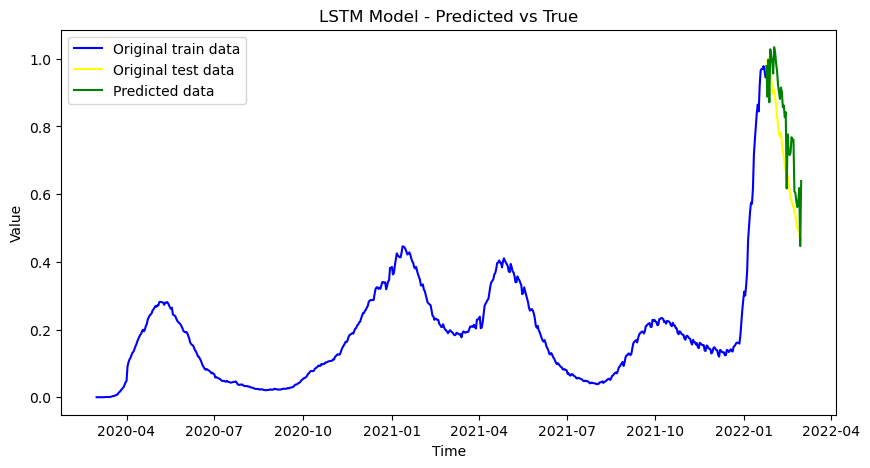

In [20]:
# Make predictions on the test data
y_pred = model.predict(X_lstm_test.reshape((X_lstm_test.shape[0], X_lstm_test.shape[1], 1)), verbose=2).reshape(-1,1)


y_true = Y_lstm_test

# Calculate root mean squared error (RMSE)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Plot the predicted and true values
plt.figure(figsize=(10, 5))
plt.plot(indexes[:Y_lstm_train.shape[0]], Y_lstm_train, color='blue', label='Original train data')
plt.plot(indexes[Y_lstm_train.shape[0]:], Y_lstm_test, color='yellow', label='Original test data')
plt.plot(indexes[Y_lstm_train.shape[0]:], y_pred, color='green', label='Predicted data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('LSTM Model - Predicted vs True')
plt.legend()
plt.show()

models_output["lstm"] = {'RMSE': rmse, 'Accuracy': np.mean(np.abs(y_pred - y_true) < 10**(-1))}

In [33]:
# Data Preprocessing for Random Forest
X_forest = dataset.drop(columns=['hosp_patients']).copy()
indexes = X_forest.index
Y_forest = dataset['hosp_patients'].copy().to_frame()


# Splitting the dataset into train and test sets
X_forest_train, X_forest_test, Y_forest_train, Y_forest_test = train_test_split(X_forest, Y_forest, test_size=0.05, shuffle=False)

# Creating a BalancedRandomForestClassifier model with specified parameters
new_model = BalancedRandomForestClassifier(n_estimators=2000, random_state=0, class_weight="balanced_subsample")

# Fitting the model on the training data
new_model.fit(X_forest_train, Y_forest_train)

# Making predictions on the test data
y_pred = new_model.predict(X_forest_test)
predictions_series = pd.Series(y_pred, index=X_forest_test.index)

# Adjust the window size to get a smoother curve
window_size =  3 

# Smoothing the predictions using rolling mean with the specified window size
smoothed_predictions = predictions_series.rolling(window=window_size, min_periods=1).mean()
y_pred = smoothed_predictions

plt.figure(figsize=(10, 5))
plt.plot(Y_forest_train, color='blue', label='Original train data')
plt.plot(Y_forest_test, color='yellow', label='Original test data')
plt.plot(indexes[Y_forest_train.shape[0]:], y_pred, color='green', label='Predicted data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Balanced Random Forest Model - Predicted vs True')
plt.legend()
plt.show()

# Normalizing Y_forest_test using the scaler
scaler.fit(Y_forest_test)
Y_forest_test = scaler.transform(Y_forest_test)

# Transforming y_pred to match the normalized scale of Y_forest_test
y_pred = scaler.transform(y_pred.to_numpy().reshape(-1, 1))

# Calculating the root mean squared error (RMSE) between Y_forest_test and y_pred
mse = mean_squared_error(Y_forest_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

models_output["forest"] = {'RMSE': rmse, 'Accuracy': np.mean(np.abs(y_pred - Y_forest_test) < 10**(-1))}

ValueError: Input X contains NaN.
BalancedRandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

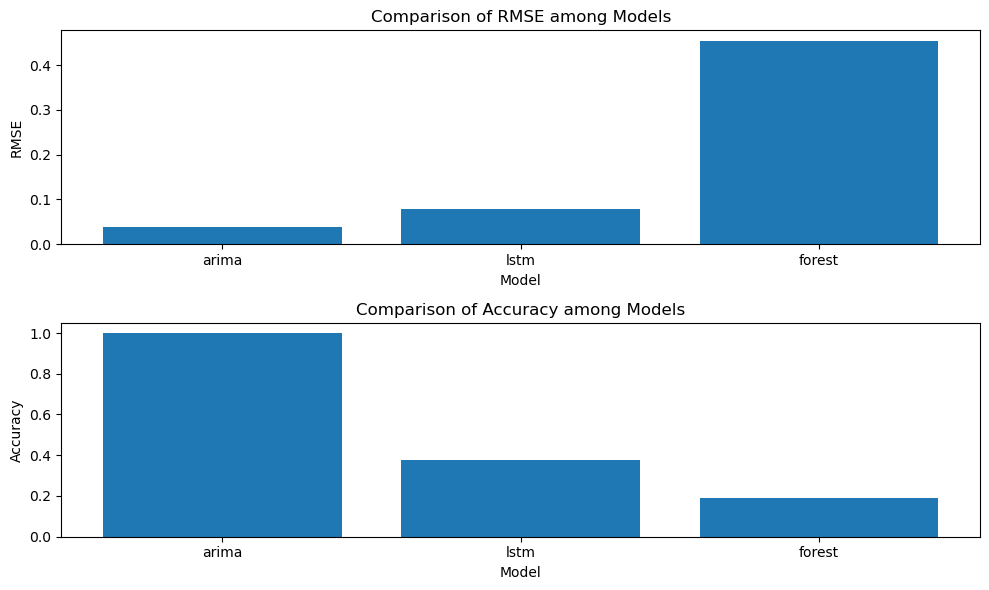

In [24]:
#Extract the model names, RMSE, and accuracy values
model_names = list(models_output.keys())
rmse_values = [models_output[model]['RMSE'] for model in model_names]
accuracy_values = [models_output[model]['Accuracy'] for model in model_names]

#Set the figure size
plt.figure(figsize=(10, 6))

#Plotting the RMSE values
plt.subplot(2, 1, 1)
plt.bar(model_names, rmse_values)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Comparison of RMSE among Models')

#Plotting the accuracy values
plt.subplot(2, 1, 2)
plt.bar(model_names, accuracy_values)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy among Models')

#Adjust the layout
plt.tight_layout()

#Display the plot
plt.show()